# 처음 설정

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/015GithubRepos/da_for_sbr')

import pickle
import os
import matplotlib.pyplot as plt
from collections import Counter

from preprocessing import *
from simmetric import *

experiment = 1

dataPATH = '/content/drive/MyDrive/015GithubRepos/da_for_sbr/exps'
expPATH = '/content/drive/MyDrive/015GithubRepos/da_for_sbr/exps'


# dataPATH = 'G:/내 드라이브/015GithubRepos/da_for_sbr/exps'
# expPATH = 'G:/내 드라이브/015GithubRepos/da_for_sbr/exps'


if not os.path.exists(f'exps/experiment{experiment}'):
    os.makedirs(f'exps/experiment{experiment}')


from preprocessing import *

# 불러올 데이터 선택
y_or_d = 'yoochoose'  # yoochoose or diginetica
frac = 1/64

# tra_seqs_frac 불러오기
tra_seqs_frac = load_tra_seqs_frac(experiment, y_or_d, frac)

# 아이템의 출현 횟수 구하기
allsess = []
for s in tra_seqs_frac:
  allsess += s

allaprcnt = len(allsess)
print(f'모든 세션의 아이템 출현 수 : {allaprcnt}')

# 아이템별 출현 횟수 카운트
allitemcntr = Counter(allsess)

# 아이템의 개수 구하기
nof_items = len(allitemcntr)

print(f'총 아이템 수 : {nof_items}')

loading file : exps/experiment1/yoochoose/y064_tra_seqs.pkl
124472
모든 세션의 아이템 출현 수 : 519275
총 아이템 수 : 17597


# 처음 한 번만 실행

In [ ]:
#%% 폴더 만들고 저장

import time


if not os.path.exists(f'exps/experiment{experiment}/yoochoose'):
    os.makedirs(f'exps/experiment{experiment}/yoochoose')
    
if not os.path.exists(f'exps/experiment{experiment}/diginetica'):
    os.makedirs(f'exps/experiment{experiment}/diginetica')
    
if not os.path.exists(f'exps/experiment{experiment}/result_narm_yoochoose'):
    os.makedirs(f'exps/experiment{experiment}/result_narm_yoochoose')
    
if not os.path.exists(f'exps/experiment{experiment}/result_narm_diginetica'):
    os.makedirs(f'exps/experiment{experiment}/result_narm_diginetica')
    
if not os.path.exists(f'exps/experiment{experiment}/result_srgnn_yoochoose'):
    os.makedirs(f'exps/experiment{experiment}/result_srgnn_yoochoose')
    
if not os.path.exists(f'exps/experiment{experiment}/result_srgnn_diginetica'):
    os.makedirs(f'exps/experiment{experiment}/result_srgnn_diginetica')

time.sleep(5)


for f in [1/64, 1/128, 1/256, 1/512]:
  if not os.path.exists(f'exps/experiment{experiment}/result_narm_yoochoose/y{int(1/frac):03}'):
      os.makedirs(f'exps/experiment{experiment}/result_narm_yoochoose')

In [6]:
for f in [1/64, 1/128, 1/256, 1/512]:
  if not os.path.exists(f'exps/experiment{experiment}/result_narm_yoochoose/y{int(1/f):03}'):
    os.makedirs(f'exps/experiment{experiment}/result_narm_yoochoose/y{int(1/f):03}')
  if not os.path.exists(f'exps/experiment{experiment}/result_srgnn_yoochoose/y{int(1/f):03}'):
    os.makedirs(f'exps/experiment{experiment}/result_srgnn_yoochoose/y{int(1/f):03}')

for f in [1/1, 1/3, 1/6, 1/12]:
  if not os.path.exists(f'exps/experiment{experiment}/result_narm_diginetica/d{int(1/f):03}'):
      os.makedirs(f'exps/experiment{experiment}/result_narm_diginetica/d{int(1/f):03}')
  if not os.path.exists(f'exps/experiment{experiment}/result_srgnn_diginetica/d{int(1/f):03}'):
      os.makedirs(f'exps/experiment{experiment}/result_srgnn_diginetica/d{int(1/f):03}')

## 원본데이터 불러오기, 전처리

In [ ]:
#%% 한 번만 실행하면됨

# 만들 데이터 선택
y_or_d = 'diginetica'

if y_or_d == 'yoochoose':
    filename = 'yoochoose-clicks-withHeader.dat'  # 원본 데이터 파일
    tra_sess, tes_sess, sess_clicks = prep_yoochoose(dataPATH, filename)
    fracs = [1/64, 1/128, 1/256, 1/512]
    
else:
    filename = 'train-item-views.csv'  # 원본 데이터 파일
    tra_sess, tes_sess, sess_clicks = prep_diginetica(dataPATH, filename)
    fracs = [1/1, 1/3, 1/6, 1/12]

# 원본데이터 전처리(통계량 확인차)
print(f'원본데이터 통계량')
tra_ids_ori, tra_dates_ori, tra_seqs_ori, item_dict_ori = obtian_tra(sess_clicks, tra_sess)

0it [00:00, ?it/s]

원래 데이터의 training 세션 수 : 186670
-- Starting @ %ss : 2021-12-24 15:25:09.154260+09:00
약 26초


1235380it [00:14, 87088.01it/s]


-- Reading data @ 2021-12-24 15:25:24.046016s
Splitting date 1464102000.0
원본데이터 통계량
train 세션 수 : 186670
train 아이템 수 :  43097


In [ ]:
#%% train 데이터로 저장 (마지막 아이템 떼서 라벨로)
from preprocessing import *

for f in fracs:
    split_frac = int(len(tra_sess) * f)
    tra_sess_frac = tra_sess[-split_frac:]
    
    print(f'----------------------------------------------')
    print(f'frac : 1/{int(1/f)}')
    tra_ids_frac, tra_dates_frac, tra_seqs_frac, item_dict_frac = obtian_tra(sess_clicks, tra_sess_frac)
    tes_ids, tes_dates, tes_seqs = obtian_tes(sess_clicks, tes_sess, item_dict_frac)
    save_tra_seqs_frac(experiment, y_or_d, f, tra_seqs_frac)

    # frac train데이터 저장
    tr_seqs_frac, tr_dates_frac, tr_labs_frac, tr_ids_frac = process_seqs(tra_seqs_frac, tra_dates_frac)
    te_seqs, te_dates, te_labs, te_ids = process_seqs(tes_seqs, tes_dates)
    tra_frac = (tr_seqs_frac, tr_labs_frac)
    tes = (te_seqs, te_labs)
    
    train_name = f'exps/experiment{experiment}/{y_or_d}/{y_or_d[0]}{int(1/f):03}_train.txt'
    print(f'train_name : {train_name}')
    test_name = f'exps/experiment{experiment}/{y_or_d}/{y_or_d[0]}{int(1/f):03}_test.txt'
    print(f'test_name : {test_name}')
    pickle.dump(tra_frac, open(train_name, 'wb'))
    pickle.dump(tes, open(test_name, 'wb'))

----------------------------------------------
frac : 1/1
train 세션 수 : 186670
train 아이템 수 :  43097
test 세션 총 개수 : 15963
test 데이터 아이템 수 :  21131
tra_seqs save dir : exps/experiment1/diginetica/d001_tra_seqs.pkl
train_name : exps/experiment1/diginetica/d001_train.txt
test_name : exps/experiment1/diginetica/d001_test.txt
----------------------------------------------
frac : 1/3
train 세션 수 : 62223
train 아이템 수 :  36427
test 세션 총 개수 : 15644
test 데이터 아이템 수 :  19651
tra_seqs save dir : exps/experiment1/diginetica/d003_tra_seqs.pkl
train_name : exps/experiment1/diginetica/d003_train.txt
test_name : exps/experiment1/diginetica/d003_test.txt
----------------------------------------------
frac : 1/6
train 세션 수 : 31111
train 아이템 수 :  29129
test 세션 총 개수 : 15000
test 데이터 아이템 수 :  17063
tra_seqs save dir : exps/experiment1/diginetica/d006_tra_seqs.pkl
train_name : exps/experiment1/diginetica/d006_train.txt
test_name : exps/experiment1/diginetica/d006_test.txt
------------------------------------------

In [ ]:
from simmetric import *

co_mat_win = get_co_matrix_win(tra_seqs_frac, 5, True, True)
save_mat_as_csr(co_mat_win, 'coo_mat', experiment, y_or_d, frac)

pmi_mat = ppmi(co_mat_win, True)
save_mat_as_csr(pmi_mat, 'pmi_mat', experiment, y_or_d, frac)

jac_mat = get_jaccard_mat(tra_seqs_frac, 5, diag_freq = True, remove_dup = True)
save_mat_as_csr(jac_mat, 'jac_mat', experiment, y_or_d, frac)
,v
tan_mat = get_tanimoto(tra_seqs_frac, window_size=5, diag_freq=True, remove_dup=True)
save_mat_as_csr(tan_mat, 'tan_mat', experiment, y_or_d, frac)

cos_mat_win = get_cosine(co_mat_win)
save_mat_as_csr(cos_mat_win, 'cos_mat', experiment, y_or_d, frac)

w2v_mat = get_w2v_model(tra_seqs_frac, nof_items)
save_mat_as_csr(w2v_mat, 'w2v_mat', experiment, y_or_d, frac)

저장파일 : exps/experiment1/yoochoose/y064_csr_coo_mat.pkl


/content/drive/MyDrive/015GithubRepos/da_for_sbr/simmetric.py:104: RuntimeWarning: invalid value encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)  # np.log2(0)이 음의 무한대가 되는 것을 막기위해 eps 사용함


0.0 % 완료
17.047391749062392 % 완료
34.094783498124784 % 완료
51.14217524718718 % 완료
68.18956699624957 % 완료
85.23695874531197 % 완료
저장파일 : exps/experiment1/yoochoose/y064_csr_pmi_mat.pkl
0.0 % 완료
5.682463916354131 % 완료
11.364927832708261 % 완료
17.047391749062392 % 완료
22.729855665416522 % 완료
28.412319581770657 % 완료
34.094783498124784 % 완료
39.777247414478914 % 완료
45.459711330833045 % 완료
51.14217524718718 % 완료
56.82463916354131 % 완료
62.507103079895444 % 완료
68.18956699624957 % 완료
73.8720309126037 % 완료
79.55449482895783 % 완료
85.23695874531197 % 완료
90.91942266166609 % 완료
96.60188657802023 % 완료
저장파일 : exps/experiment1/yoochoose/y064_csr_jac_mat.pkl
10.00% 완료
20.00% 완료
30.00% 완료
40.00% 완료
50.00% 완료
60.00% 완료
70.00% 완료
80.00% 완료
90.00% 완료
100.00% 완료
저장파일 : exps/experiment1/yoochoose/y064_csr_tan_mat.pkl
10.00% 완료
20.00% 완료
30.00% 완료
40.00% 완료
50.00% 완료
60.00% 완료
70.00% 완료
80.00% 완료
90.00% 완료
저장파일 : exps/experiment1/yoochoose/y064_csr_cos_mat.pkl


In [ ]:
w2v_mat = get_w2v_model(tra_seqs_frac, nof_items)
save_mat_as_csr(w2v_mat, 'w2v_mat', experiment, y_or_d, frac)

저장파일 : exps/experiment1/yoochoose/y064_csr_w2v_mat.pkl


# 데이터 증강

In [3]:
#%% falog2만들기, hs딕셔너리(msd, most hightest similarity dictionary) 불러오기

import math
falog2 = {k:math.log2(v+1) for k, v in allitemcntr.items()}

from simmetric import *
msd = load_msd('coo', experiment, y_or_d, frac)

nof_sessions = len(tra_seqs_frac)


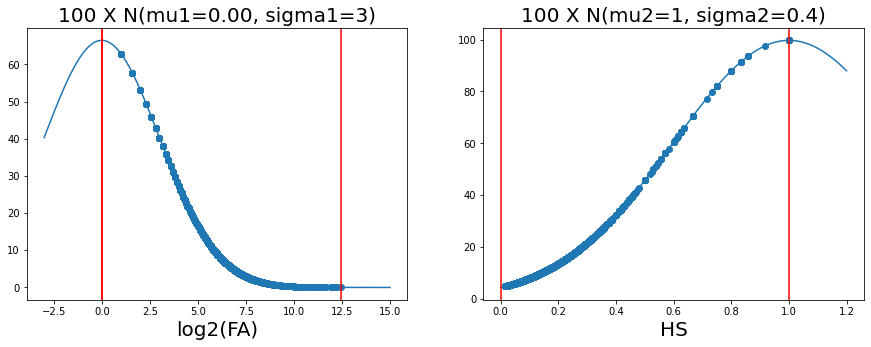

In [4]:
#%% hyperparameter setting

alpha = 500
mu1 = 0
sigma1 = 3

beta = 500
mu2 = 1
sigma2 = 0.4




#%% 출현빈도 그리기 ##############################################


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)


min(falog2.values())
min(allitemcntr.values())


M = max(falog2.values())

# x, y 생성
x = [falog2[i] for i in range(1, nof_items+1)]
y = [alpha * gaussian(mu1, sigma1, _) for _ in x]
plt.scatter(x, y)

# 가우시안 선
x = np.linspace(-3, 15, 1000)
y = gaussian(mu1, sigma1, x) * alpha
plt.plot(x, y)

# 수선
plt.axvline(x=0, color='r')
plt.axvline(x=mu1, color='r')
plt.axvline(x=M, color='r')


plt.xlabel('log2(FA)', fontsize=20)
plt.title(f'100 X N(mu1={mu1:.2f}, sigma1={sigma1})', fontsize=20)
#####################################################################


#%%

plt.subplot(1, 2, 2)

x = [msd[i][1] for i in range(1, nof_items+1)]
y = [100*gaussian(mu2, sigma2, _) for _ in x]

plt.scatter(x, y)

# 가우시안 선
x = np.linspace(0, 1.2, 1000)
y = gaussian(mu2, sigma2, x) * 100
plt.plot(x, y)

# 수선
plt.axvline(x=0, color='r')
plt.axvline(x=1, color='r')


plt.xlabel('HS', fontsize=20)
plt.title(f'100 X N(mu2={mu2}, sigma2={sigma2})', fontsize=20)
#####################################################################

theta = [alpha, mu1, sigma1, beta, mu2, sigma2]

def cal_score(logfa: float , hsvalue: float, theta) -> float:

  alpha, mu1, sigma1, beta, mu2, sigma2 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]

  alphaterm = alpha * gaussian(mu1, sigma1, logfa)
  betaterm = beta * gaussian(mu2, sigma2, hsvalue)

  score = alphaterm + betaterm

  return score

score = {i : cal_score(falog2[i], msd[i][1], theta) for i in range(1, nof_items+1)}

In [5]:
sess_score_mean = dict()
for sid, s in enumerate(tra_seqs_frac):
  scorelist = [score[item] for idx, item in enumerate(s)]
  sess_score_mean[sid] = (np.mean(scorelist), len(s))  # sess_score_mean[session id] = (session's score mean, session length)

 
aug_target = sorted(sess_score_mean.items(), key=lambda x: (x[1][0], -x[1][1]), reverse=True)
aug_target[:10]

[(156, (556.5071653814214, 2)),
 (223, (556.5071653814214, 2)),
 (1219, (556.5071653814214, 2)),
 (1303, (556.5071653814214, 2)),
 (2170, (556.5071653814214, 2)),
 (2501, (556.5071653814214, 2)),
 (2731, (556.5071653814214, 2)),
 (2846, (556.5071653814214, 2)),
 (3113, (556.5071653814214, 2)),
 (3221, (556.5071653814214, 2))]

In [6]:
aug_target = [_[0] for _ in aug_target]
aug_target[:10]

[156, 223, 1219, 1303, 2170, 2501, 2731, 2846, 3113, 3221]

### 증강 대상 세션 정렬 끝, 증강(증강 안되는 세션은 건너뛰기)

In [ ]:
ar = 0.5  # augmentation rate
nof_aug = int(nof_sessions * ar)  # number of augmentation
print(f'number of sessions : {nof_sessions}')
print(f'augmentation rate : {ar}')
print(f'number of augmentation : {nof_aug}')


cr = 0.5  # choice rate
print(f'choice rate : {ar}')

number of sessions : 124472
augmentation rate : 0.5
number of augmentation : 62236
choice rate : 0.5


In [ ]:
cnt = 0  # 증강 성공할때마다 하나씩 카운트
aug_sess = []  # 증강 완료된 세션을 모음


for rank, sid in enumerate(aug_target):

  s = tra_seqs_frac[sid].copy()  # 안변하고 참고하는거
  sess = tra_seqs_frac[sid].copy()  # 실제로 변하는거
  slen = len(sess)

  scorelist = np.array([score[item] for item in sess])

  np.random.choice(range(len(sess)), math.floor(len(sess) * cr))

  p = np.array(scorelist) / np.sum(scorelist)

  augidxs = np.random.choice(range(len(sess)), math.floor(len(sess) * cr), replace=False, p=p)

  nof_sub = np.random.choice(slen + 1, 1)[0]  # 대체할 개수
  sub_it_idxs = augidxs[:nof_sub]
  isrt_it_idxs = augidxs[nof_sub:]


  # sforsub에 대체
  for sitidx in sub_it_idxs:
    # 가장 유사한 아이템 찾기 -> 자기 자신과만 유사한 아이템만 아니면 대체
    mostsimitem_s = msd[sess[sitidx]][0]
    if sess[sitidx] != mostsimitem_s:
      sess[sitidx] = mostsimitem_s  # 대체
  
  # 삽입할 아이템 구하기
  isrt_items = []  # 삽입할 아이템을 모음
  isrt_it_idxs_over = []  # 삽입할 인덱스를 모음
  for iitidx in isrt_it_idxs:
    # 가장 유사한 아이템 찾기 -> 자기자신과만 유사한 아이템 아니면 삽입
    mostsimitem_i = msd[sess[iitidx]][0]
    if sess[iitidx] != mostsimitem_i:
      isrt_items.append(mostsimitem_i)  # 삽입할 아이템
      isrt_it_idxs_over.append(iitidx)  # 삽입할 인덱스

  sess = np.insert(np.asarray(sess), isrt_it_idxs_over, isrt_items)  # 삽입
  sess = list(sess)

  if s != sess:
    cnt += 1
    print(f'************성공**************')
    aug_sess.append(sess)

  if cnt == nof_aug:
    break
  
  print(f'순위 : {rank}')
  print(f'원래 세션   : {s}')
  print(f'증강된 세션 : {sess}')
  print(f'p : {p}')
  print(f'score mean: {np.mean(scorelist):.2f}')
  print()


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
원래 세션   : [1016, 1992, 1016]
증강된 세션 : [1016, 1016, 1016]
p : [0.30481964 0.39036071 0.30481964]
score mean: 42.07

************성공**************
순위 : 62377
원래 세션   : [284, 163]
증강된 세션 : [136, 284, 163]
p : [0.45929548 0.54070452]
score mean: 42.07

************성공**************
순위 : 62378
원래 세션   : [1340, 942]
증강된 세션 : [1340, 82, 942]
p : [0.54911718 0.45088282]
score mean: 42.07

************성공**************
순위 : 62379
원래 세션   : [18, 18, 340]
증강된 세션 : [18, 5, 340]
p : [0.38267312 0.38267312 0.23465375]
score mean: 42.07

************성공**************
순위 : 62380
원래 세션   : [3584, 1239, 564, 174, 27, 1000]
증강된 세션 : [174, 27, 564, 27, 27, 1000]
p : [0.1542418  0.14495428 0.19355868 0.20529056 0.19886831 0.10308638]
score mean: 42.07

************성공**************
순위 : 62381
원래 세션   : [346, 368, 6133, 368, 2710, 6133]
증강된 세션 : [904, 368, 6133, 260, 2710, 578]
p : [0.16819539 0.15094507 0.1731661  0.15094507 0.18358228 0.1731661 ]
score mean: 42.07

*********

In [ ]:
len(aug_sess)

62236

In [ ]:
def crop_seqs(iseqs):
    out_seqs = []
    labs = []
    for seq in iseqs:
        for i in range(1, len(seq)):
            tar = seq[-i]  # tar : 맨 뒤 아이템 하나씩 잘라 라벨로
            labs += [tar]
            out_seqs += [seq[:-i]]
    return out_seqs, labs

In [ ]:
aug_tra, aug_tra_l = crop_seqs(tra_seqs_frac + aug_sess)
aug_tra_final = (aug_tra, aug_tra_l)

In [ ]:
filename_save = f'exps/experiment{experiment}/{y_or_d}/{y_or_d[0]}{int(1/frac):03}_testhaha.txt'
print(filename_save)
pickle.dump(aug_tra_final, open(filename_save, 'wb'))

exps/experiment1/yoochoose/y064_testhaha.txt


# 모델 돌리기

In [7]:
from models import *

In [9]:
trainfiles = [
              'y064_testhaha.txt'
              ]
            
narm(trainfiles, 1, 'yoochoose', 1/64)

Namespace(batch_size=512, embed_dim=50, epoch=100, hidden_size=100, lr=0.001, lr_dc=0.1, lr_dc_step=80, test=False, test_file='exps/', topk=20, train_file='exps/', valid=False, valid_portion=0.1)
--------------------------------------------------
Dataset info:
Number of sessions: 631221
--------------------------------------------------
--------------------------------------------------
Dataset info:
Number of sessions: 55424
--------------------------------------------------
아이템 개수 : 17597
1 ~ 17597
모델에 들어가는 수 : 17598


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://git

Epoch 0 : Recall@20: 38.5052, MRR@20: 18.3442 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 1 : Recall@20: 48.3372, MRR@20: 21.5808 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 2 : Recall@20: 53.8722, MRR@20: 23.4841 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 3 : Recall@20: 58.1762, MRR@20: 25.2252 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 4 : Recall@20: 60.4949, MRR@20: 25.8543 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 5 : Recall@20: 62.4928, MRR@20: 26.6754 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 6 : Recall@20: 64.1073, MRR@20: 27.3940 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 7 : Recall@20: 64.9674, MRR@20: 27.6573 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 8 : Recall@20: 65.6859, MRR@20: 27.7790 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 9 : Recall@20: 66.4098, MRR@20: 27.9706 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 10 : Recall@20: 66.6069, MRR@20: 28.2392 	y064_testhaha.txt 	 1/1 	 y064_test.txt
Epoch 11 : Recall@20: 67.2269, MRR@20: 28.

# 시각화

In [6]:
experiment = 1


import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [11]:
def generate_label(y_or_d, fn, dstgsh_idx):
  # print(fn, dstgsh_idx)

  simmet = fn[dstgsh_idx:dstgsh_idx+3]
  return simmet
  if y_or_d == 'yoochoose':

    if fn[dstgsh_idx] == 'coo':
      label = f'{fn[dstgsh_idx+1:dstgsh_idx+4]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    elif fn[dstgsh_idx] == 'p':
      label = f'{fn[dstgsh_idx+1:dstgsh_idx+4]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    elif fn[dstgsh_idx] == 'w':
      label = f'{fn[dstgsh_idx:dstgsh_idx+3]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    elif fn[dstgsh_idx] == 'j':  # jaccard_apr, jaccard_win
      label = f'{fn[dstgsh_idx:dstgsh_idx+11]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    else:
      if fn[dstgsh_idx+1] == 'r':
        label = f'yoochoose original'
      elif fn[dstgsh_idx+1] == 'a':  # tanimoto
        label = f'{fn[dstgsh_idx:13]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
      else:
        label = fn

  elif y_or_d == 'diginetica':
    if fn[dstgsh_idx] == 'c':
      if fn[dstgsh_idx+2] == 's':
        label = f'{fn[dstgsh_idx:+10]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
      else:
        label = f'{fn[dstgsh_idx:5]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    elif fn[dstgsh_idx] == 'p':
      label = f'{fn[dstgsh_idx+1:7]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    elif fn[dstgsh_idx] == 'w':
      label = f'{fn[dstgsh_idx:dstgsh_idx+3]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    elif fn[dstgsh_idx] == 'j':  # jaccard_apr, jaccard_win
      label = f'{fn[dstgsh_idx:dstgsh_idx+11]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
    else:  # train, tanimoto
      if fn[dstgsh_idx+1] == 'r':
        label = f'diginetica original'
      else:  # tanimoto
        label = f'{fn[dstgsh_idx:dstgsh_idx+8]}, l : {fn[-26]}, ps : {fn[-22:-19]}, pl : {fn[-16:-13]}'
  else:
    print('y_or_d error')
    return None
  
  return label


def cls_sorting(fn, cls_idx):
  if fn[cls_idx:cls_idx+2] == 'HH':
    if fn[cls_idx:cls_idx+4] == 'HHLH':
      return 5
    elif fn[cls_idx:cls_idx+8] == 'HHHLLHLL':
      return 6
    else:
      return 1
  elif fn[cls_idx:cls_idx+2] == 'LH':
    return 2
  elif fn[cls_idx:cls_idx+2] == 'HL':
    return 3
  elif fn[cls_idx:cls_idx+2] == 'LL':
    return 4
  else:
    return 0




def sort_fn(fn, dstgsh_idx, cls_idx):
  dstgsh_met = fn[dstgsh_idx:dstgsh_idx+3]
  cls_digit = cls_sorting(fn, cls_idx)
  if dstgsh_met == 'tra': 
    return 10 + cls_digit
  elif dstgsh_met == 'con':
    return 20 + cls_digit
  elif dstgsh_met == 'pmi':
    return 30 + cls_digit
  elif dstgsh_met == 'jac':
    return 40 + cls_digit
  elif dstgsh_met == 'tan':
    return 50 + cls_digit
  elif dstgsh_met == 'cos':
    return 60 + cls_digit
  else:
    return 70 + cls_digit
  


def plot_result(model, experiment, y_or_d, frac):
  # figure(figsize=(8, 7), dpi=100)
  maxresult = 0
  dstgsh_idx = 5
  cls_idx = 20
  tr_cnt = 0

  train_hit_result = 0
  train_mrr_result = 0

  if model == 'narm':
    result_path = f'/content/drive/MyDrive/015GithubRepos/da_for_sbr/exps/experiment{experiment}/result_{model}_{y_or_d}/{y_or_d[0]}{int(1/frac):03}'
  elif model == 'srgnn':
    result_path = f'/content/drive/MyDrive/015GithubRepos/da_for_sbr/exps/experiment{experiment}/result_{model}_{y_or_d}/{y_or_d[0]}{int(1/frac):03}'
  else:
    print('model name error')
    return None


  from os import listdir
  from os.path import isfile, join
  fns = [f for f in listdir(result_path) if isfile(join(result_path, f))]
  fns = sorted(fns, key=lambda x:sort_fn(x, dstgsh_idx, cls_idx))


  only_filename = []
  for fullfn in fns:
    if fullfn[:-9] not in only_filename:
      only_filename.append(fullfn[:-9])
    # train 개수 찾기
    if fullfn[dstgsh_idx:dstgsh_idx+2] == 'tr':
      tr_cnt += 1
  


  a = 'file name'
  b = 'hits'
  c = 'mrrs'
  print(f'{a:<40} {b:<20} \t {c:<20}')
  print()

  tr_cnt_reading = 0
  # train데이터 처리
  train_hit_result_list = []
  train_mrr_result_list = []
  for onlyfn in only_filename:
    with open(f'{result_path}/{onlyfn}_hits.pkl', 'rb') as q:
      hit_result = pickle.load(q)
    with open(f'{result_path}/{onlyfn}_mrrs.pkl', 'rb') as q:
      mrr_result = pickle.load(q)



    if model == 'srgnn':
      if len(hit_result) < 30:
        hit_result += [hit_result[-1] for _ in range(30-len(hit_result))]
      if len(mrr_result) < 30:
        mrr_result += [mrr_result[-1] for _ in range(30-len(mrr_result))]

    if model == 'narm':
      if len(hit_result) < 100:
        hit_result += [hit_result[-1] for _ in range(100-len(hit_result))]

      if len(mrr_result) < 100:
        mrr_result += [mrr_result[-1] for _ in range(100-len(mrr_result))]

    # dstgsh_idx = get_dstgsh_idx(onlyfn, y_or_d)
    # dstgsh_idx = 5

    if onlyfn[dstgsh_idx:dstgsh_idx+2] == 'tr':
      train_hit_result_list.append(hit_result)  # train 결과를 변수에 저장
      train_mrr_result_list.append(mrr_result)  # train 결과를 변수에 저장

      train_hit_result = np.mean(np.array(train_hit_result_list), axis=0)
      train_mrr_result = np.mean(np.array(train_mrr_result_list), axis=0)
      tr_cnt_reading += 1

      print(f'{onlyfn:<40} {hit_result[-1]:<20.4f}  \t {mrr_result[-1]:<20.4f}')
      if tr_cnt / 2 == tr_cnt_reading:
        temp = 'mean of train : '
        print(f'{temp:<40} {train_hit_result[-1]:<20.4f}  \t {train_mrr_result[-1]:<20.4f}')


    else:
      if hit_result[-1] > train_hit_result[-1]:
        hit_goodornot = f'(+{hit_result[-1] - train_hit_result[-1]:.4f})****'
      else:
        hit_goodornot = f'({hit_result[-1] - train_hit_result[-1]:.4f})'

      if mrr_result[-1] > train_mrr_result[-1]:
        mrr_goodornot = f'(+{mrr_result[-1] - train_mrr_result[-1]:.4f})****'
      else:
        mrr_goodornot = f'({mrr_result[-1] - train_mrr_result[-1]:.4f})'

      print(f'{onlyfn:40} {hit_result[-1]:<6.4f}{hit_goodornot:<10} \t {mrr_result[-1]:<6.4f}{mrr_goodornot:<10}')

  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10), dpi=80)
  # hits
  tr_hit_cnt = 0
  for onlyfn in only_filename:
    with open(f'{result_path}/{onlyfn}_hits.pkl', 'rb') as q:
      hit_result = pickle.load(q)

    if onlyfn[dstgsh_idx:dstgsh_idx+2] == 'tr':
      tr_hit_cnt += 1
      if tr_hit_cnt == tr_cnt / 2:
        axes[0].plot(train_hit_result, label=f'{y_or_d[0]}{int(1/frac)}_train', marker='o', markersize=10)
    else:
      axes[0].plot(hit_result, label=onlyfn)
      
  axes[0].set_title('Recall@20', fontsize = 22) # Y label
  axes[0].set_xlabel('epochs', fontsize = 20) # X label
  axes[0].tick_params(axis='x', labelsize=20)
  axes[0].tick_params(axis='y', labelsize=20)
  # axes[0].set_ylim((62, 70))
  # axes[0].legend(fontsize=15)

  # mrrs
  tr_mrr_cnt = 0
  for onlyfn in only_filename:
    with open(f'{result_path}/{onlyfn}_mrrs.pkl', 'rb') as q:
      mrr_result = pickle.load(q)
    if onlyfn[dstgsh_idx:dstgsh_idx+2] == 'tr':
      tr_mrr_cnt += 1
      if tr_mrr_cnt == tr_cnt / 2:
        axes[1].plot(train_mrr_result, label=f'{y_or_d[0]}{int(1/frac)}_train', marker='o', markersize=10)
    else:
      axes[1].plot(mrr_result, label=onlyfn)
  axes[1].set_title('MRR@20', fontsize = 22) # Y label
  axes[1].set_xlabel('epochs', fontsize = 20) # X label
  axes[1].tick_params(axis='x', labelsize=20)
  axes[1].tick_params(axis='y', labelsize=20)
  axes[1].legend(bbox_to_anchor=(1, 1), fontsize=15)
  # axes[1].set_ylim((27, 30.2))
  
  

file name                                hits                 	 mrrs                

y064_train.txt                           70.6404               	 30.0955             
y064_train2.txt                          70.5006               	 30.1899             
y064_train3.txt                          70.9217               	 30.2759             
y064_train4.txt                          70.7425               	 30.1382             
mean of train :                          70.7013               	 30.1749             
y064_testhaha.txt                        70.6368(-0.0645)  	 29.9582(-0.2167) 


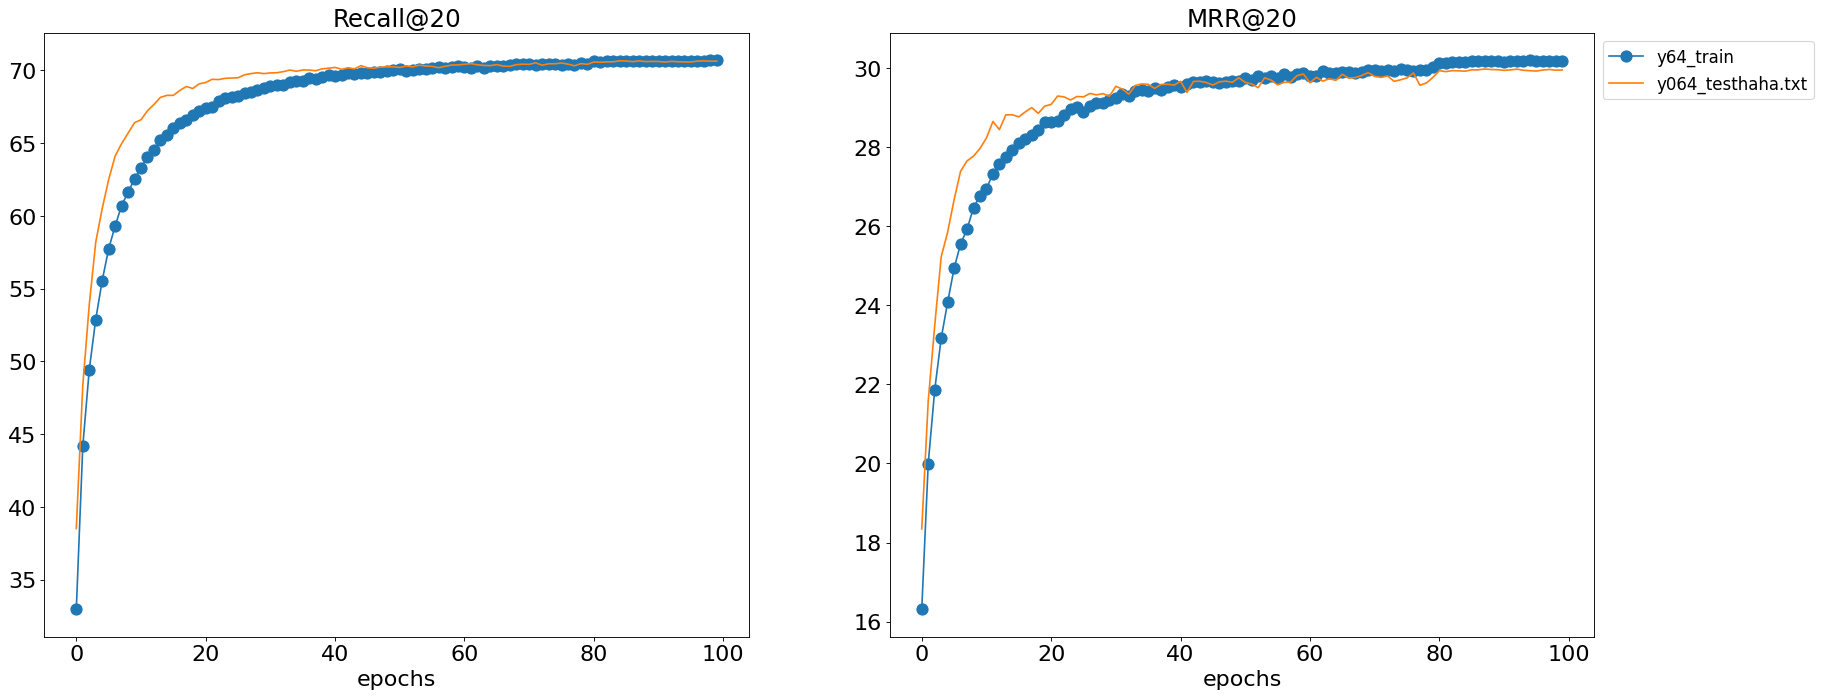

In [12]:
model='narm'  # 'narm' or 'srgnn'
y_or_d='yoochoose'  # 'yoochoose' or 'diginetica'
h_or_m='h'  # 'h' for hits / 'm' for mrrs

plot_result(model, experiment, y_or_d, 1/64)